In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import image_formats_and_conversions as tools
import cv2
import scipy

from scipy import ndimage
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data


In [219]:
#Askisi1
Original_image=mpimg.imread('aloe-plant-pot.jpg')


Text(0.5, 0.98, 'Grayscale')

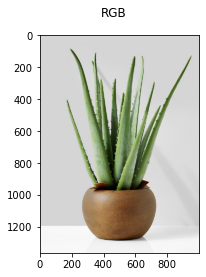

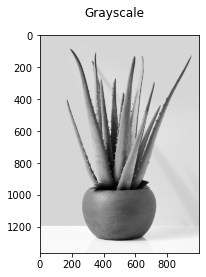

In [220]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

#-------------------------main program---------------------------------

img = mpimg.imread('aloe-plant-pot.jpg',format=str)


grayscale_image=rgb2gray(img)

grayscale_image=np.around(grayscale_image)
grayscale_image=np.uint8(grayscale_image)


plt.figure(1)
plt.imshow(img)
plt.suptitle('RGB')

plt.figure(2)
plt.imshow(grayscale_image,cmap="gray")
plt.suptitle('Grayscale')

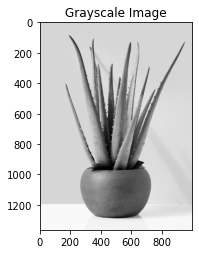

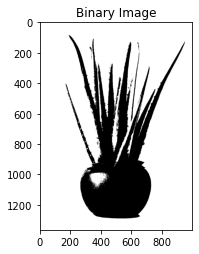

In [221]:
from skimage.filters import threshold_otsu

grayscale_image=rgb2gray(img)

thresh = threshold_otsu(grayscale_image)
binary_image = grayscale_image > thresh
binary_image = binary_image.astype(int)

plt.figure()
subplot_1 = plt.subplot(1,2,1)
plt.imshow(grayscale_image, cmap='gray')
subplot_1.set_title('Grayscale Image')

plt.figure()
subplot_1 = plt.subplot(1,2,2)
plt.imshow(binary_image, cmap='gray')
subplot_1.set_title('Binary Image')

plt.savefig('figure') # ΑΠΟΘΗΚΕΥΣΗ FIGURE

In [247]:


columns, rows = grayscale_image.shape[:2]

katheta = np.linspace(-127, 128, rows)
orizontia = np.linspace(-127, 128, columns)

x,y = np.meshgrid(katheta, orizontia)

apostasi = np.sqrt(np.power(x,2)+np.power(y,2))
katofli = apostasi < 120


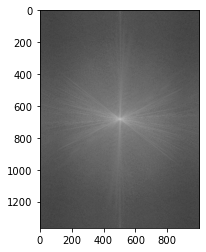

In [248]:
grayscale_image_DFT = np.fft.fft2(grayscale_image)

grayscale_image_centered_DFT = np.fft.fftshift(grayscale_image_DFT)
grayscale_image_centered_DFT_normalized = tools.normalize_fft_image(grayscale_image_centered_DFT)

grayscale_image_centered_DFT_normalized = tools.float_to_uint8(grayscale_image_centered_DFT_normalized)

plt.imshow(grayscale_image_centered_DFT_normalized, cmap='gray')

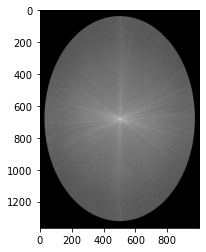

In [249]:
mask_circle = katofli * grayscale_image_centered_DFT
mask_circle_normalized = tools.normalize_fft_image(mask_circle)
mask_circle_final = tools.float_to_uint8(mask_circle_normalized)

plt.imshow(mask_circle_final, cmap='gray')

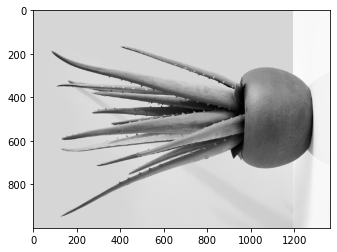

In [225]:
image_transposed = np.transpose(grayscale_image)
plt.imshow(image_transposed, cmap = "gray")

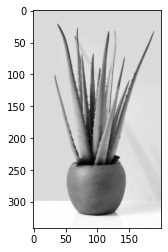

In [226]:
image_resized = resize(grayscale_image, (grayscale_image.shape[0] // 4, grayscale_image.shape[1] // 5),
anti_aliasing=True)

plt.imshow(image_resized, cmap='gray')

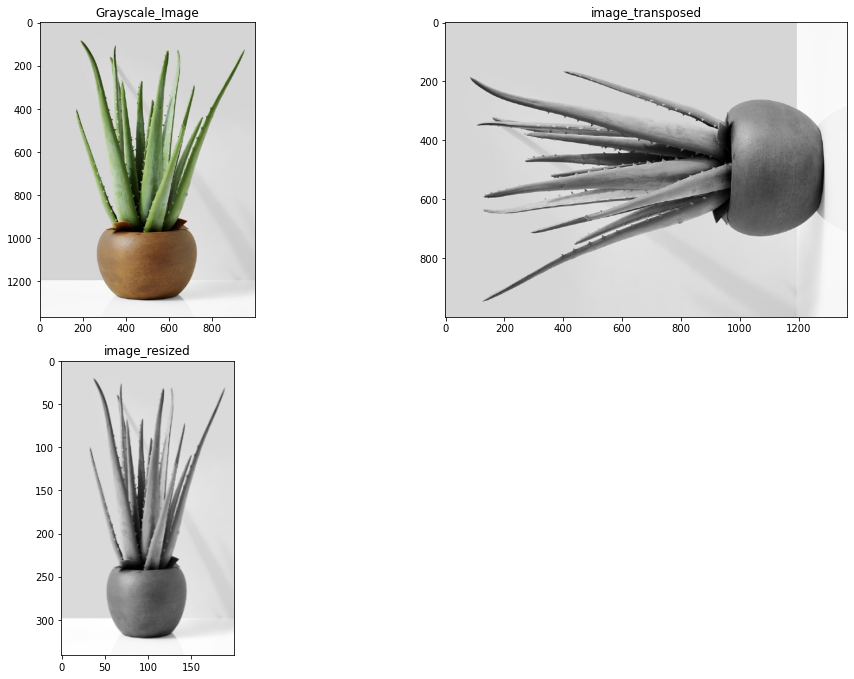

In [230]:
figure1=plt.figure(1, figsize=(14, 14))

subplot1=figure1.add_subplot(3,2,1)
plt.imshow(Original_image,cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(3,2,2)
plt.imshow(image_transposed,cmap="gray")
subplot1.set_title('image_transposed')

subplot1=figure1.add_subplot(3,2,3)
plt.imshow(image_resized,cmap="gray")
subplot1.set_title('image_resized')

figure1.tight_layout()

Text(0.5, 1.0, 'Gaussian_Image')

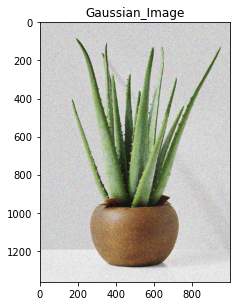

In [227]:
std=50

figure1 = plt.figure(1, figsize=(10.5, 10.5))
gaussian_image = gaussian_noise(grayscale_image,50)

subplot1 = figure1.add_subplot(2,2,2)
plt.imshow(gaussian_image, cmap='gray')
subplot1.set_title('Gaussian_Image')

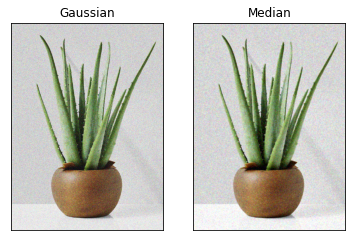

In [228]:

median = cv2.medianBlur(gaussian_image,5)

plt.subplot(121),plt.imshow(gaussian_image),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

In [176]:
#ασκηση7#

In [177]:
img = mpimg.imread('noise_world_map.png')
grayscale_image2 = rgb2gray(img)

In [178]:
columns=len(grayscale_image2)
rows=len(grayscale_image2[0])

katheta = np.linspace(-127, 128,rows )
orizontia = np.linspace(-127, 128, columns)

x,y = np.meshgrid(katheta, orizontia)

apostasi=np.sqrt(np.power(x,2)+np.power(y,2))
n=1
base=15
katofli_n_1=1/(1+(np.power(apostasi,2*n)/np.power(base,2*n)))
n=2
base=25
katofli_n_2=1/(1+(np.power(apostasi,2*n)/np.power(base,2*n)))

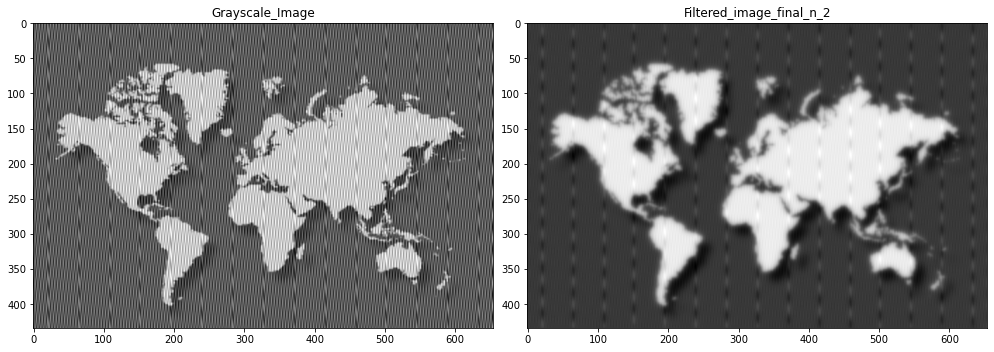

In [179]:
Grayscale_Image_DFT=np.fft.fft2(grayscale_image2)
Grayscale_Image_Centered_DFT=np.fft.fftshift(Grayscale_Image_DFT)

Grayscale_Image_Centered_DFT_normalized=np.log(1+np.abs(Grayscale_Image_Centered_DFT))
Grayscale_Image_Centered_DFT_Final=tools.float_to_uint8(Grayscale_Image_Centered_DFT_normalized)

#-----------------------------------------------------------------------------------------------------------

mask_circle_n_1=katofli_n_1*Grayscale_Image_Centered_DFT
mask_circle_normalized_n_1=np.log(1+np.abs(mask_circle_n_1))
mask_circle_final_n_1=tools.float_to_uint8(mask_circle_normalized_n_1)

#------------------------------------------------------------------------------------------------------------
Filtered_image_n_1=np.fft.ifft2(mask_circle_n_1)
Filtered_image_normalized_n_1=np.abs(Filtered_image_n_1)
Filtered_image_final_n_1=tools.float_to_float64(Filtered_image_normalized_n_1)
#------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------

mask_circle_n_2=katofli_n_2*Grayscale_Image_Centered_DFT
mask_circle_normalized_n_2=np.log(1+np.abs(mask_circle_n_2))
mask_circle_final_n_2=tools.float_to_uint8(mask_circle_normalized_n_2)

#------------------------------------------------------------------------------------------------------------
Filtered_image_n_2=np.fft.ifft2(mask_circle_n_2)
Filtered_image_normalized_n_2=np.abs(Filtered_image_n_2)
Filtered_image_final_n_2=tools.float_to_float64(Filtered_image_normalized_n_2)
#------------------------------------------------------------------------------------------------------------


figure1=plt.figure(1, figsize=(14, 14))

subplot1=figure1.add_subplot(3,2,1)
plt.imshow(grayscale_image2,cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(3,2,2)
plt.imshow(Filtered_image_final_n_1,cmap="gray")
subplot1.set_title('Filtered_image_final_n_2')

figure1.tight_layout()